In [1]:
import utils
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
df = utils.load_dataset()

100%|██████████| 23/23 [00:10<00:00,  2.29it/s]


In [3]:
df = utils.clean_dataset(df)

Lowering case of text fields
Extracting TotalReviews
Dropping Null values
Filling Null values
Dropping unused columns
Deduplicating


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025197 entries, 0 to 1025197
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Name          1025197 non-null  object 
 1   Authors       1025197 non-null  object 
 2   PublishYear   1025197 non-null  int64  
 3   Publisher     1025197 non-null  object 
 4   Rating        1025197 non-null  float64
 5   PagesNumber   1025197 non-null  float64
 6   TotalReviews  1025197 non-null  int64  
 7   Description   1025197 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 70.4+ MB


<AxesSubplot: >

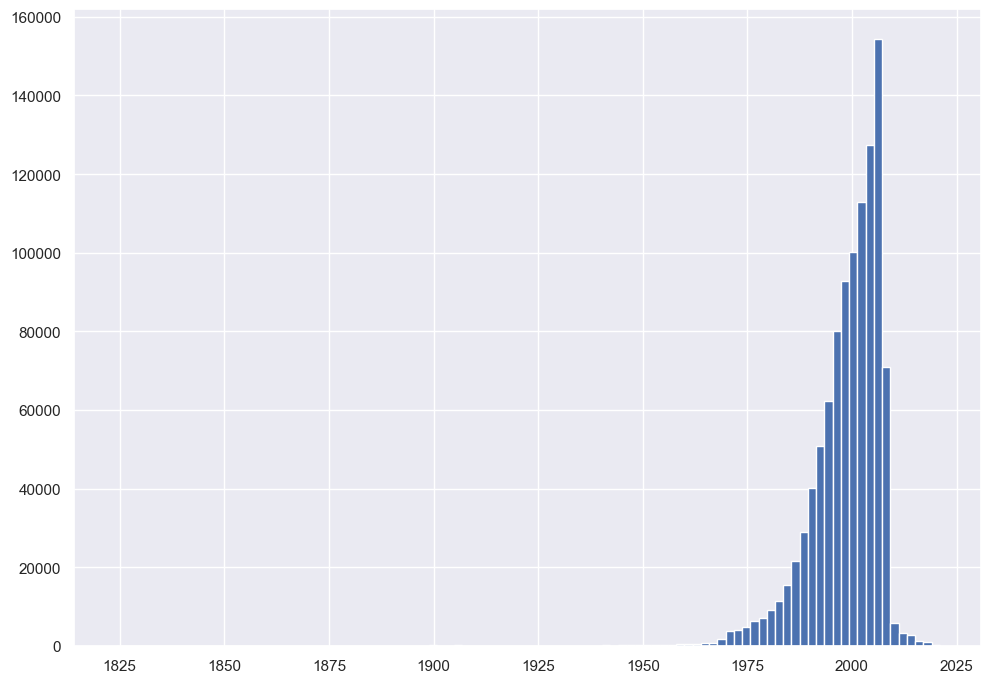

In [6]:
df.PublishYear.hist(bins=100)

# Questions about the data

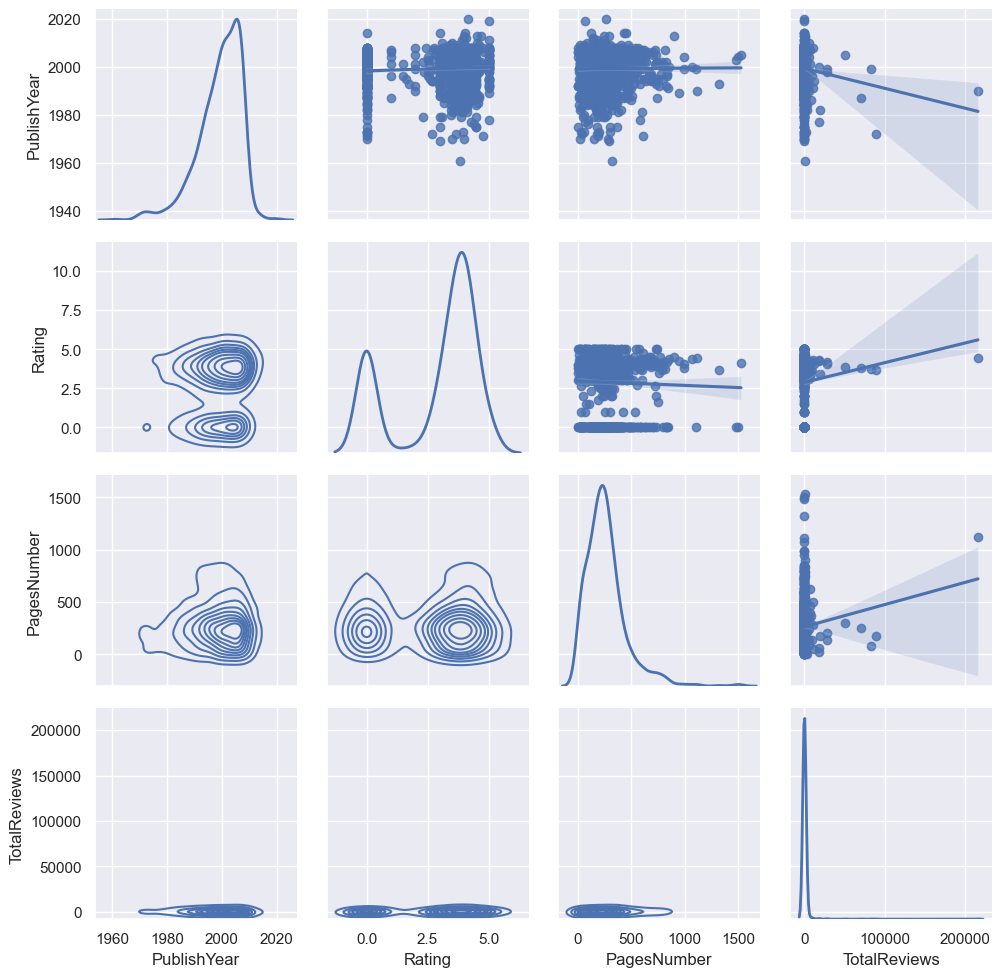

In [7]:
g = sns.PairGrid(df.sample(1000), diag_sharey=False)
g.map_upper(sns.regplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

- How many different publishers are there?

In [8]:
# publishers = pd.Series(reduce(lambda x,y: x + y, df['Publisher'], []), name='Publisher')
publishers = df['Publisher'].explode()

In [9]:
publishers.nunique()

40126

- Who are the top 5 publishers (most published books)?

In [10]:
publishers_count = publishers.groupby(by=publishers).agg(count='size').sort_values(by='count', ascending=False)
publishers_count.head()

,count
Publisher,
routledge,30730
springer,29017
cambridge university press,20315
"oxford university press, usa",19582
wiley,10107


- Which are the top 5 longest books in the dataset?

In [11]:
df.head()

,Name,Authors,PublishYear,Publisher,Rating,PagesNumber,TotalReviews,Description
0,!%@:: a directory of electronic mail addressin...,!%@:: a directory of electronic mail addressin...,1993,[o'reilly media],0.00,458.0,0,"these days, it's a rare person who hasn't hear..."
1,!arrebátalo!: la fe que se mantiene firme ante...,!arrebátalo!: la fe que se mantiene firme ante...,2006,[casa creación],4.00,254.0,2,<i>¡aprende a caminar en el poder de la fe vio...
2,"!buen viaje!, course 1, student edition","!buen viaje!, course 1, student edition",1999,[Unknown],2.80,514.0,5,this three-level program brings you every reso...
3,!búscalo! (look it up!): a quick reference gui...,!búscalo! (look it up!): a quick reference gui...,1998,[wiley],3.82,224.0,11,a novel approach--very useful for quick refere...
4,"!ceviche!: seafood, salads, and cocktails with...","!ceviche!: seafood, salads, and cocktails with...",2001,[running press],3.71,192.0,7,"nuevo latino never tasted as cool, hot, and de..."


In [12]:
df[['PagesNumber', 'Name']].sort_values(by=['PagesNumber'], ascending=False).head()

,PagesNumber,Name
6578,4517845.0,"425 heartwarmin' expressions for crafting, pai..."
4841,107490.0,2006 essential guide to the national security ...
682308,100000.0,scholar's library series x
473393,80300.0,lisa and david/jordi
4864,56086.0,2007 cia world factbook updated guide to the...


- What is the average/median rating of all books?

In [13]:
df['Rating'].describe()

count    1.025197e+06
mean     2.877599e+00
std      1.728556e+00
min      0.000000e+00
25%      1.500000e+00
50%      3.670000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

- Does publisher explain amount of reviews?

In [14]:
top_publishers = publishers_count.sort_values('count', ascending=False).head(30)
# For each book, we get the intersection of its publisher with the list of top publishers
top_publishers_projection = df.Publisher.apply(set(top_publishers.index).intersection)
# We keep all books with at least 1 top publisher and keep just one
publishers_books_from_top_publishers = top_publishers_projection[top_publishers_projection.apply(len) > 0].apply(lambda s: list(s)[0])
# We get the subset of books from df which have at least 1 top publisher and make a copy
books_from_top_publishers = df.loc[publishers_books_from_top_publishers.index].copy()
# We store the top calculated publisher for each book
books_from_top_publishers['TopPublisher'] = publishers_books_from_top_publishers

[Text(0, 0, 'turtleback books'),
 Text(1, 0, 'thorndike press'),
 Text(2, 0, 'ballantine books'),
 Text(3, 0, 'Unknown'),
 Text(4, 0, 'harpercollins publishers'),
 Text(5, 0, "st. martin's press"),
 Text(6, 0, 'dover publications'),
 Text(7, 0, 'kessinger publishing'),
 Text(8, 0, 'yale university press'),
 Text(9, 0, 'university of california press'),
 Text(10, 0, 'oxford university press, usa'),
 Text(11, 0, 'university press of america'),
 Text(12, 0, 'prentice hall'),
 Text(13, 0, 'cambridge university press'),
 Text(14, 0, 'iuniverse'),
 Text(15, 0, 'palgrave macmillan'),
 Text(16, 0, 'authorhouse'),
 Text(17, 0, 'rowman & littlefield publishers'),
 Text(18, 0, 'princeton university press'),
 Text(19, 0, 'university of chicago press'),
 Text(20, 0, 'john wiley & sons'),
 Text(21, 0, 'routledge'),
 Text(22, 0, 'state university of new york press'),
 Text(23, 0, 'wiley-blackwell'),
 Text(24, 0, 'wiley'),
 Text(25, 0, 'praeger'),
 Text(26, 0, 'sage publications, inc'),
 Text(27, 0, '

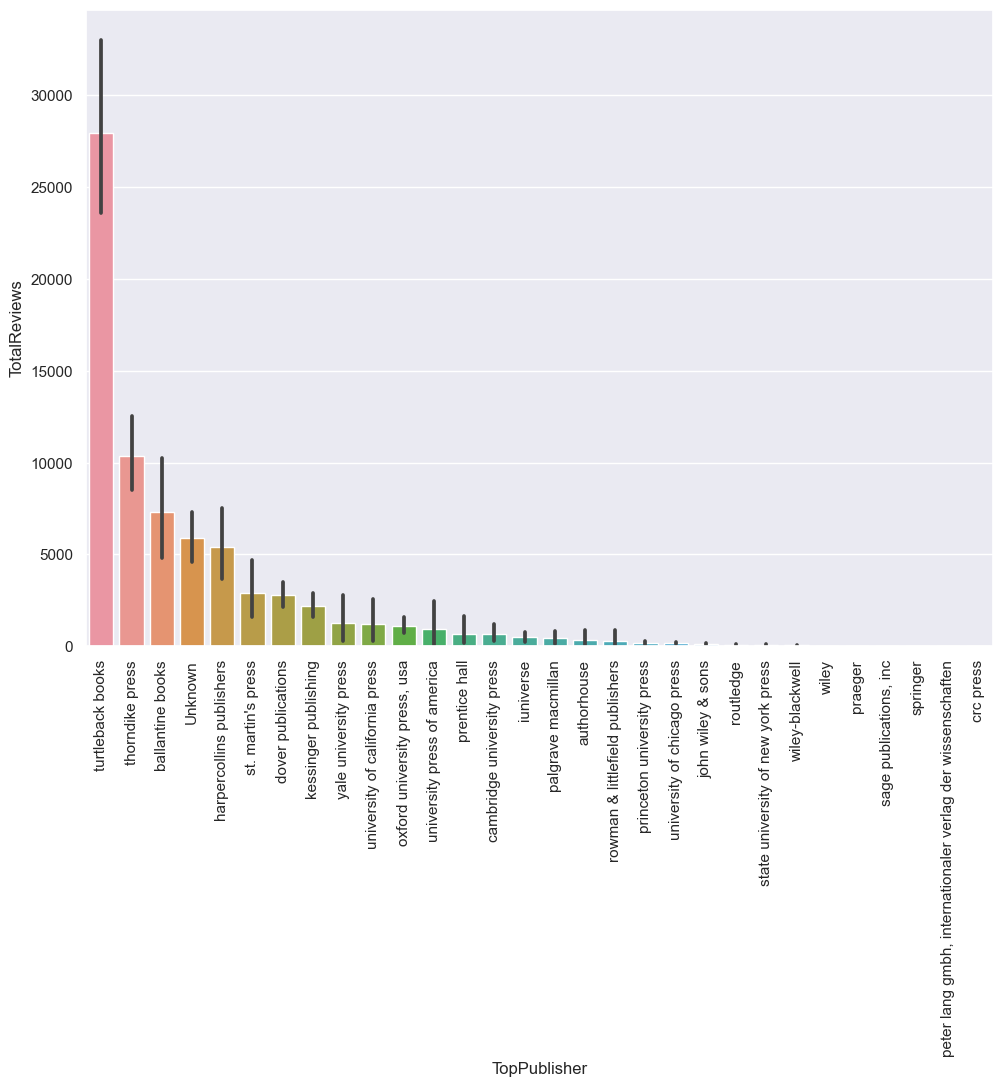

In [15]:
# keep all books which at least one of the publishers is in the set of top publishers
publishers_in_desc_order = books_from_top_publishers.groupby('TopPublisher').TotalReviews.mean().sort_values(ascending=False).index

g = sns.barplot(data=books_from_top_publishers,
                x='TopPublisher',
                y='TotalReviews',
                order=publishers_in_desc_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- Does the number of pages impact the amount of reviews?

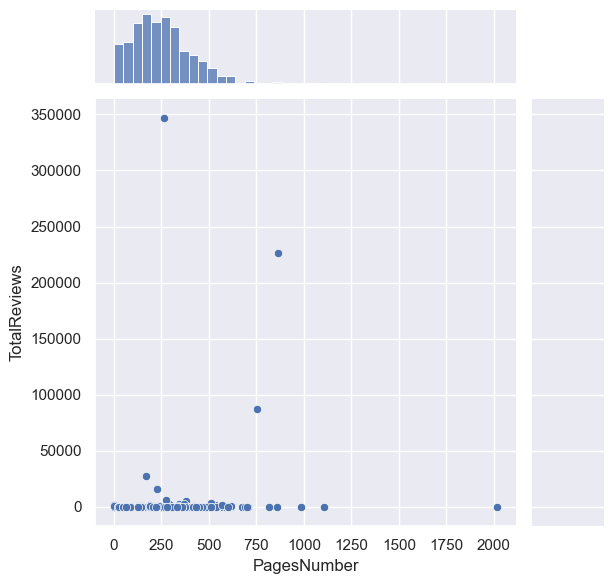

In [16]:
g = sns.jointplot(data=df.sample(500),
                x='PagesNumber',
                y='TotalReviews')
# g.set(yscale='log')
# # g.set(ylim=(0, ))
# g.set(xlim=(0, 5000))

- Does the number of reviews impact the rating?

[(0.0, 10000.0)]

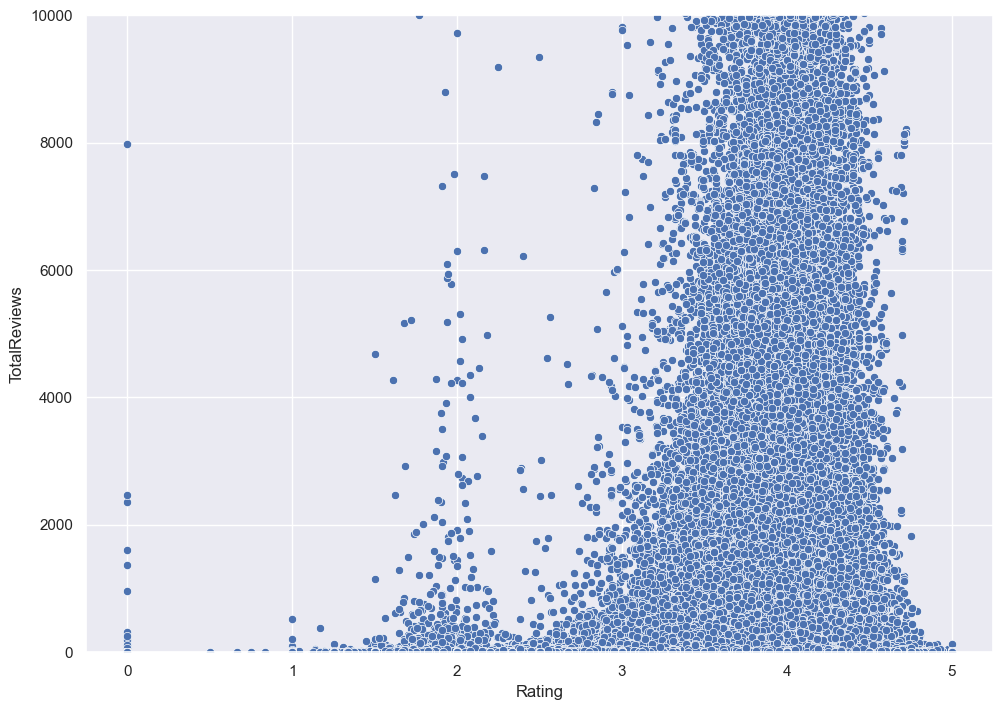

In [17]:
g = sns.scatterplot(data=df,
                x='Rating',
                y='TotalReviews')
g.set(ylim=(0, 10000))

- Is there a relationship between time since publication and amount of reviews?

In [18]:
df.PublishYear

0          1993
1          2006
2          1999
3          1998
4          2001
           ... 
1025193    2006
1025194    2004
1025195    2004
1025196    1994
1025197    2004
Name: PublishYear, Length: 1025197, dtype: int64

[Text(0, 0, '1950'),
 Text(1, 0, '1951'),
 Text(2, 0, '1952'),
 Text(3, 0, '1953'),
 Text(4, 0, '1954'),
 Text(5, 0, '1955'),
 Text(6, 0, '1956'),
 Text(7, 0, '1957'),
 Text(8, 0, '1958'),
 Text(9, 0, '1959'),
 Text(10, 0, '1960'),
 Text(11, 0, '1961'),
 Text(12, 0, '1962'),
 Text(13, 0, '1963'),
 Text(14, 0, '1964'),
 Text(15, 0, '1965'),
 Text(16, 0, '1966'),
 Text(17, 0, '1967'),
 Text(18, 0, '1968'),
 Text(19, 0, '1969'),
 Text(20, 0, '1970'),
 Text(21, 0, '1971'),
 Text(22, 0, '1972'),
 Text(23, 0, '1973'),
 Text(24, 0, '1974'),
 Text(25, 0, '1975'),
 Text(26, 0, '1976'),
 Text(27, 0, '1977'),
 Text(28, 0, '1978'),
 Text(29, 0, '1979'),
 Text(30, 0, '1980'),
 Text(31, 0, '1981'),
 Text(32, 0, '1982'),
 Text(33, 0, '1983'),
 Text(34, 0, '1984'),
 Text(35, 0, '1985'),
 Text(36, 0, '1986'),
 Text(37, 0, '1987'),
 Text(38, 0, '1988'),
 Text(39, 0, '1989'),
 Text(40, 0, '1990'),
 Text(41, 0, '1991'),
 Text(42, 0, '1992'),
 Text(43, 0, '1993'),
 Text(44, 0, '1994'),
 Text(45, 0, '1995')

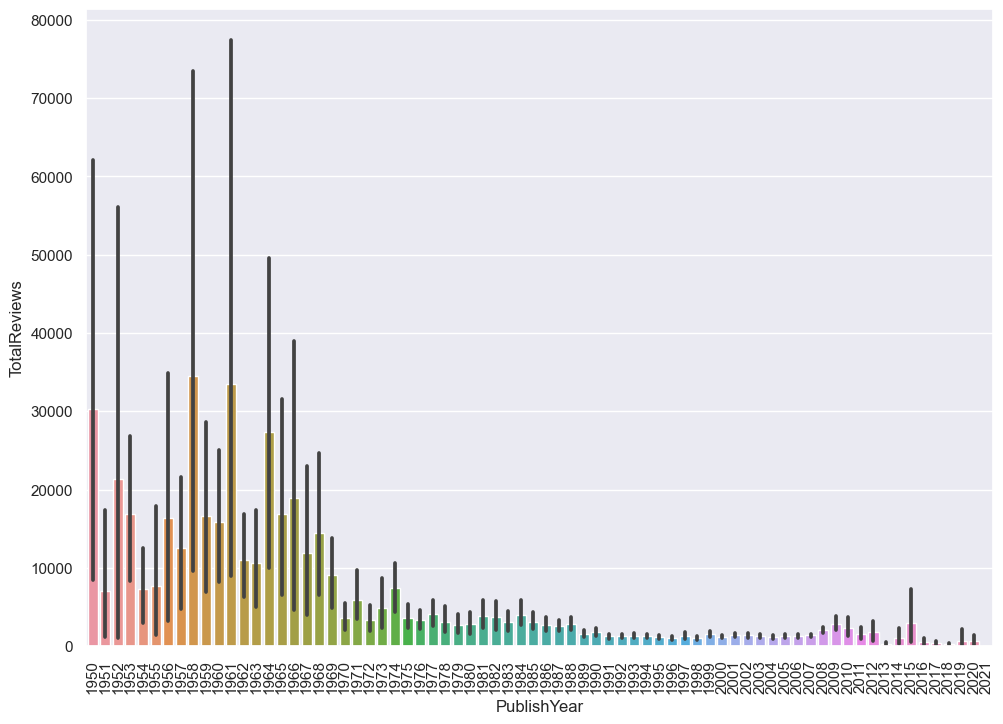

In [20]:
last_years_df = df[df['PublishYear'] >= 1950]
g = sns.barplot(data=last_years_df.sort_values(by='PublishYear'),
                x='PublishYear',
                y='TotalReviews')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [21]:
last_years_df[last_years_df['PublishYear'] == 2003].sort_values('TotalReviews', ascending=False).head(10)

,Name,Authors,PublishYear,Publisher,Rating,PagesNumber,TotalReviews,Description
357719,harry potter and the order of the phoenix (har...,harry potter and the order of the phoenix (har...,2003,"[raincoast books, bloomsbury]",4.50,767.0,2437527,there is a door at the end of a silent corrido...
357718,harry potter and the order of the phoenix,harry potter and the order of the phoenix,2003,"[bloomsbury publishing plc, bloomsbury]",4.50,395.0,2408318,<i>dumbledore lowered his hands and surveyed h...
845170,the kite runner,the kite runner,2003,"[bloomsbury uk, turtleback books]",4.30,362.0,2394717,"the unforgettable, heartbreaking story of the ..."
670406,romeo and juliet: texts and contexts,romeo and juliet: texts and contexts,2003,[st. martin's press],3.75,475.0,2008217,this edition of shakespeare's romeo and juliet...
854303,the lovely bones,the lovely bones,2003,"[picador, hachette audio, chivers, windsor, pa...",3.81,328.0,2005160,"""my name was salmon, like the fish; first name..."
801242,"the da vinci code (robert langdon, #2)","the da vinci code (robert langdon, #2)",2003,"[random house audio publishing group, findaway...",3.85,0.0,1908715,"with <i>the da vinci code,</i> dan brown maste..."
801241,the da vinci code (robert langdon #2),the da vinci code (robert langdon #2),2003,[books on tape],3.85,16.0,1880888,the menacing secret catholic organization know...
459012,le passeur,le passeur,2003,[l'école des loisirs],4.13,288.0,1733156,"dans le monde où vit jonas, la guerre, la pauv..."
538279,mujercitas,mujercitas,2003,"[edimat libros, edimat libros, edimat libros]",4.08,304.0,1636925,<i>mujercitas</i> es la novela parcialmente au...
913884,the time traveler's wife,the time traveler's wife,2003,"[Unknown, wheeler publishing, macadam/cage, vi...",3.97,224.0,1565581,<p><b><i>new york times</i> bestseller<br /><b...


In [22]:
last_years_df[last_years_df['PublishYear'] == 2009].sort_values('TotalReviews', ascending=False).head(10)

,Name,Authors,PublishYear,Publisher,Rating,PagesNumber,TotalReviews,Description
357745,harry potter und der orden des phönix (harry p...,harry potter und der orden des phönix (harry p...,2009,[carlsen verlag gmbh],4.50,1020.0,2492469,the fifth book in the harry potter series tran...
833336,the help,the help,2009,[amy einhorn books/g.p. putnam's sons],4.46,451.0,2176064,<i>librarian's note: an alternate cover editio...
878816,the picture of dorian gray book,the picture of dorian gray book,2009,[pearson education],4.08,74.0,955708,classic / british english an artist paints a p...
825522,"the girl who played with fire (millennium, #2)","the girl who played with fire (millennium, #2)",2009,[maclehose press],4.24,569.0,804975,lisbeth salander is a wanted woman. two millen...
395159,"if i stay (if i stay, #1)","if i stay (if i stay, #1)",2009,[dutton books for young readers],3.94,201.0,714619,<i>librarian note: an alternate cover for this...
847331,the last olympian (percy jackson and the olymp...,the last olympian (percy jackson and the olymp...,2009,[Unknown],4.50,11.0,673263,all year the half-bloods have been preparing f...
344040,great expectations (comics),great expectations (comics),2009,[classical comics],3.78,160.0,652798,"charles dickens' tale of pip, miss havisham an..."
181572,confessions of a shopaholic (movie tie-in edit...,confessions of a shopaholic (movie tie-in edit...,2009,[dell],3.65,384.0,648276,millions of readers have come to adore new yor...
348465,guernsey literary and potato peel pie society,guernsey literary and potato peel pie society,2009,[Unknown],4.17,248.0,611522,the letters comprising this small charming nov...
701422,siddhartha: an indian poem,siddhartha: an indian poem,2009,[the modern library new york],4.03,160.0,560581,"herman hesse's classic novel has delighted, in..."
